# <center> Chart Image Classification </center>

## Problem statement:

- Develop a CNN based classification architecture for classifying a given chart image to one of   five chart classes,namely “Line”,“Dot Line”,“Horizontal Bar”,“Vertical Bar”, and “Pie” chart.
- Use train and val images for training and validation in an appropriate ratio(e.g., 80% for
  training and 20 % for validating). The CSV file contains corresponding labels for the images.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import BatchNormalization

In [2]:
path = './charts/train_val'
# Load the CSV file containing the image labels
path_val = './charts/test'
labels = pd.read_csv(".\\charts\\train_val.csv")

In [3]:
print(labels.shape)

(1000, 2)


In [4]:
encoder = LabelEncoder()
y = ['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']

encoder.fit(y)
# Encode the labels in the 'chart_type' column
labels['chart_type_encoded'] = encoder.fit_transform(labels['type'])
np.unique(labels['type'])

array(['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical'],
      dtype=object)

In [5]:
noOfClasses = len (np.unique(labels['chart_type_encoded']))
noOfClasses

5

In [6]:
# Load the chart images
images = []
classNo = []
chartimages = []
myPicList = os.listdir(path)
for filename in myPicList:
    curImg = cv2.imread(path +"/"+filename)
    index = filename.split(".")[0]
    chartclass =  labels.loc[labels['image_index'] == int(index), 'chart_type_encoded'].iloc[0]
    #curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)
    #curImg = cv2.resize(curImg, (224, 224))
    #print(type(chartclass))
    #if(chartclass == 1):
        #plt.subplot(10, 10,  1)
        #plt.imshow(curImg)
        #plt.show()        
    curImg = cv2.resize(curImg,(32,32))
    images.append(curImg)
    classNo.append(chartclass)

In [7]:
valdateImages = []
myPicList = os.listdir(path_val)
for y in myPicList:
    curImg = cv2.imread(path_val + "/"+y)
    curImg = cv2.resize(curImg,(32,32))
    valdateImages.append(curImg)
        
        


In [8]:
# Convert the images and labels into numpy arrays
images = np.array(images)
classNo = np.array(classNo)
valdateImages = np.array(valdateImages)

In [9]:
print("train data images Shape")
print(images.shape)
print("train data class No shape ")
print(classNo.shape)
print(valdateImages.shape)

train data images Shape
(1000, 32, 32, 3)
train data class No shape 
(1000,)
(50, 32, 32, 3)


# Spliting Data

In [10]:
X_train,X_test,y_train,y_test = train_test_split(images,classNo,test_size=0.2)
print("X train data shape is ......",X_train.shape)
print("X test data shape is .......",X_test.shape)
print("Y train data shape is ......",y_train.shape)
print("Y test data shape is .......",y_test.shape)

X train data shape is ...... (800, 32, 32, 3)
X test data shape is ....... (200, 32, 32, 3)
Y train data shape is ...... (800,)
Y test data shape is ....... (200,)


# spliting validate data

In [11]:
#X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2)
#print("X train data shape is ......",X_train.shape)
#print("X validate data shape is .......",X_validate.shape)
#print("Y train data shape is ......",y_train.shape)
#print("Y validate data shape is .......",y_validate.shape)

# check how many images we have of each class

In [12]:
numOfSamples = []
print(noOfClasses)
for x in range (0, noOfClasses):
    numOfSamples.append(len(np.where(y_train == x)[0]))
    #print(len(np.where(y_train == x)[0]))
print(numOfSamples)

5
[161, 162, 156, 159, 162]


In [13]:
import matplotlib.pyplot as plt

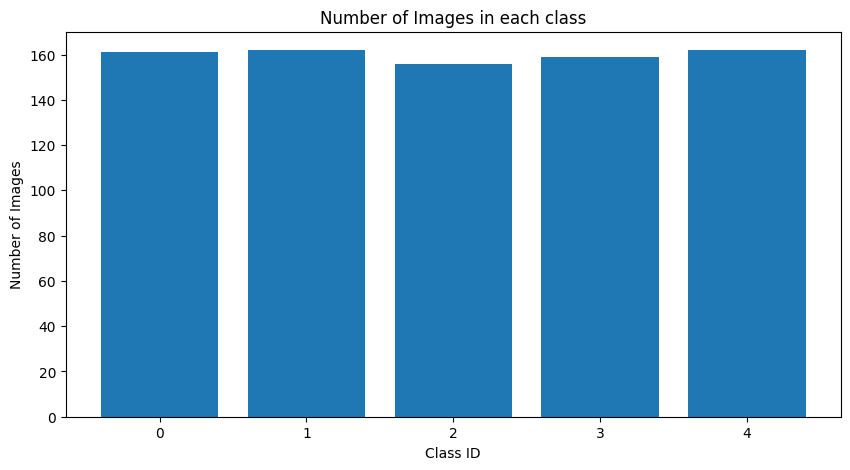

In [14]:
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses), numOfSamples)
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
  
# naming the title of the plot
plt.title('Number of Images in each class')
plt.show()

In [15]:
def preProcessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

In [16]:
X_train = np.array(list(map(preProcessing,X_train)))

In [17]:
X_test = np.array(list(map(preProcessing,X_test)))
X_validate = np.array(list(map(preProcessing,valdateImages)))

# adding depth

In [18]:
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
print(X_train.shape)

(800, 32, 32)
(800, 32, 32, 1)


In [19]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validate = X_validate.reshape(X_validate.shape[0],X_validate.shape[1],X_validate.shape[2],1)

# Agumentation

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [21]:
dataGen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range = 0.1,
                             zoom_range = 0.2)
dataGen.fit(X_train)
#dataGen.fit(X_test)
#dataGen.fit(X_validate)

In [22]:
y_train = to_categorical(y_train, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)
#y_validate = to_categorical(y_validate, noOfClasses)

In [23]:
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [24]:
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3,3)
    sizeOfPool = (2,2)
    noOfNode = 500
    imageDimensions = (32,32,3)
    model = Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape = (imageDimensions[0],imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(noOfFilters,sizeOfFilter1,activation='relu')))
    model.add(MaxPooling2D(pool_size = sizeOfPool))
    model.add(BatchNormalization()) 
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation='relu')))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation='relu')))
    model.add(MaxPooling2D(pool_size = sizeOfPool))
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(noOfNode,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation = 'softmax'))
    model.compile(Adam(learning_rate = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return model

## Model 1

In [25]:
model1 = myModel()
#print(modelwe.summary())
batchSizeVal = 40
epochsVal = 30
stepsPerEpoch = 20
# history = model.fit(dataGen.flow(X_train,y_train,batch_size = batchSizeVal),
#                    steps_per_epoch = stepsPerEpoch, epochs = epochsVal, validation_data = (X_test,y_test),
#                    shuffle = 1)
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), steps_per_epoch = stepsPerEpoch, epochs = epochsVal, batch_size=32)


Epoch 1/30
20/20 [==============================] - 4s 133ms/step - loss: 1.1749 - accuracy: 0.5797 - val_loss: 1.7254 - val_accuracy: 0.1950
Epoch 2/30
20/20 [==============================] - 2s 121ms/step - loss: 0.4283 - accuracy: 0.8203 - val_loss: 2.0027 - val_accuracy: 0.1950
Epoch 3/30
20/20 [==============================] - 2s 117ms/step - loss: 0.3331 - accuracy: 0.8422 - val_loss: 2.3686 - val_accuracy: 0.2050
Epoch 4/30
20/20 [==============================] - 2s 120ms/step - loss: 0.3127 - accuracy: 0.8531 - val_loss: 2.3756 - val_accuracy: 0.1950
Epoch 5/30
20/20 [==============================] - 2s 114ms/step - loss: 0.2812 - accuracy: 0.8703 - val_loss: 2.5193 - val_accuracy: 0.2100
Epoch 6/30
20/20 [==============================] - 2s 116ms/step - loss: 0.1766 - accuracy: 0.9234 - val_loss: 2.7392 - val_accuracy: 0.1950
Epoch 7/30
20/20 [==============================] - 2s 117ms/step - loss: 0.1839 - accuracy: 0.9141 - val_loss: 1.7174 - val_accuracy: 0.3100
Epoch 

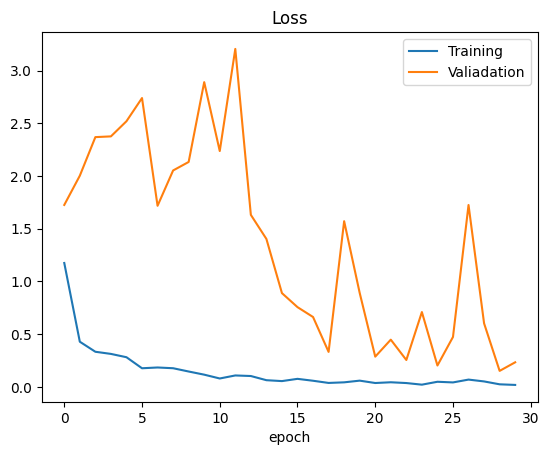

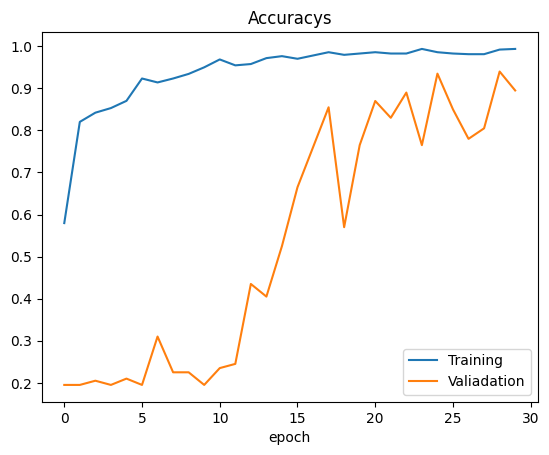

test score 0.23315641283988953
Test Accuracy  0.8949999809265137


In [26]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Valiadation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Valiadation'])
plt.title('Accuracys')
plt.xlabel('epoch')
plt.show()
score = model1.evaluate(X_test,y_test,verbose = 0)
print('test score' , score[0])
print('Test Accuracy ',score[1])

7/7 [==============================] - 0s 22ms/step


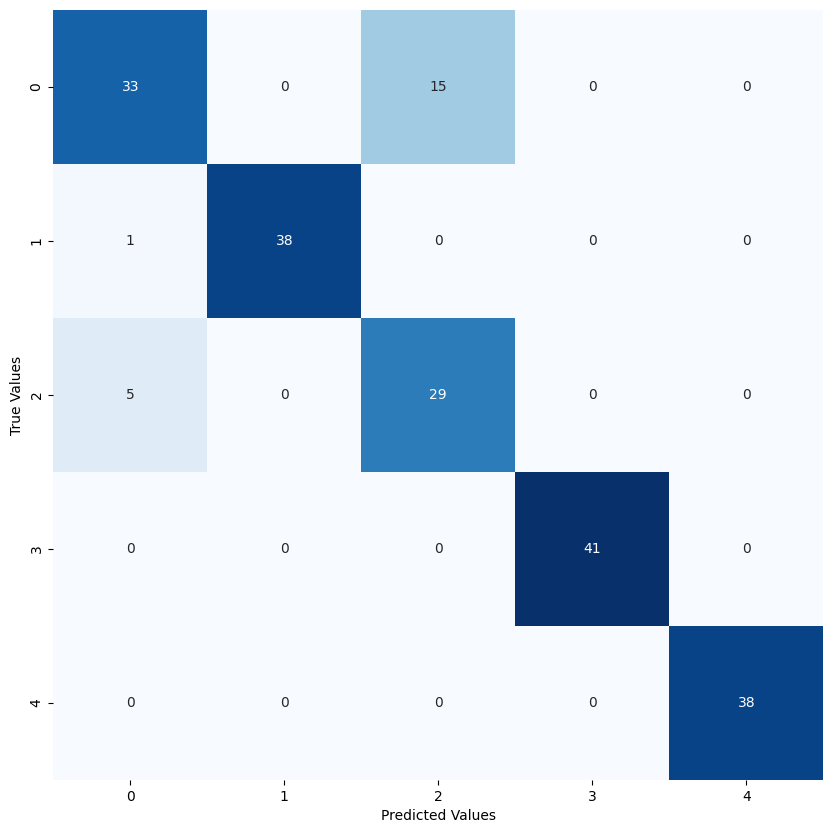

In [27]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model1.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [28]:
y_predicted = model1.predict(X_validate)
#y_predicted[4]
lenofval = len(X_validate)
print(lenofval)
chatlabel = []
imageindex = []
for x in range (0, lenofval):
    #print(x)
    pred = np.argmax(y_predicted[x])
    #print('prs val',pred)
    chatlabel.append(pred)
    #imageindex.append(x)
#chatlabel
#imageindex
    #plt.matshow(X_validate[x])

2/2 [==============================] - 0s 17ms/step
50


In [29]:
df = pd.DataFrame(chatlabel, columns =['chart_type_encoded'])
y = ['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']
label_enc = LabelEncoder()
label_enc.fit(y)
# Encode the labels in the 'chart_type' column
df['chart_type'] = label_enc.inverse_transform(df['chart_type_encoded'])
df

,chart_type_encoded,chart_type
0,4,vbar_categorical
1,1,hbar_categorical
2,0,dot_line
3,1,hbar_categorical
4,0,dot_line
5,0,dot_line
6,3,pie
7,0,dot_line
8,1,hbar_categorical
9,4,vbar_categorical


In [30]:
train_steps = X_train.shape[0] 
valid_steps = X_test.shape[0] 

es = tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

rp = tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

## Model 2

In [ ]:
model2 = myModel()

#batchSizeVal = 40
#epochsVal = 100
#stepsPerEpoch = 10
#history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), steps_per_epoch = stepsPerEpoch, epochs = epochsVal, batch_size=16,callbacks=[es, rp])
batchSizeVal = 40
epochsVal = 30
stepsPerEpoch = 20
# history = model.fit(dataGen.flow(X_train,y_train,batch_size = batchSizeVal),
#                    steps_per_epoch = stepsPerEpoch, epochs = epochsVal, validation_data = (X_test,y_test),
#                    shuffle = 1)
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), steps_per_epoch = stepsPerEpoch, epochs = epochsVal, batch_size=32,callbacks=[es, rp])


Epoch 1/30
20/20 [==============================] - 4s 135ms/step - loss: 1.0762 - accuracy: 0.6187 - val_loss: 1.7947 - val_accuracy: 0.1950 - lr: 0.0010
Epoch 2/30
20/20 [==============================] - 2s 125ms/step - loss: 0.4793 - accuracy: 0.7859 - val_loss: 2.4477 - val_accuracy: 0.1950 - lr: 0.0010
Epoch 3/30
20/20 [==============================] - 3s 127ms/step - loss: 0.3605 - accuracy: 0.8422 - val_loss: 2.8680 - val_accuracy: 0.1900 - lr: 0.0010
Epoch 4/30
20/20 [==============================] - 3s 125ms/step - loss: 0.2836 - accuracy: 0.8797 - val_loss: 3.0594 - val_accuracy: 0.2200 - lr: 0.0010
Epoch 5/30
20/20 [==============================] - 3s 126ms/step - loss: 0.2129 - accuracy: 0.9000 - val_loss: 3.5934 - val_accuracy: 0.2250 - lr: 0.0010
Epoch 6/30
20/20 [==============================] - 3s 126ms/step - loss: 0.2024 - accuracy: 0.9219 - val_loss: 3.7455 - val_accuracy: 0.2200 - lr: 0.0010
Epoch 7/30
20/20 [==============================] - 3s 126ms/step - lo

In [ ]:
model2.evaluate(X_test, y_test)

In [ ]:
#model2.evaluate(X_validate, y_validate)
y_predicted = model2.predict(X_validate)
#y_predicted[4]
lenofval = len(X_validate)
chatlabel = []
for x in range (0, lenofval):
    #print(x)
    pred = np.argmax(y_predicted[x])
    #print('prs val',pred)
    chatlabel.append(pred)
    imageindex.append(x)
#chatlabel
imageindex
df = pd.DataFrame(chatlabel, columns =['chart_type_encoded'])
y = ['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']
label_enc = LabelEncoder()
label_enc.fit(y)
# Encode the labels in the 'chart_type' column
df['chart_type'] = label_enc.inverse_transform(df['chart_type_encoded'])
df

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Valiadation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Valiadation'])
plt.title('Accuracys')
plt.xlabel('epoch')
plt.show()
score = model2.evaluate(X_test,y_test,verbose = 0)
print('test score' , score[0])
print('Test Accuracy ',score[1])

In [ ]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model2.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

## Model 3

In [ ]:
model3 = myModel()
batchSizeVal = 10
epochsVal = 100
stepsPerEpoch = 20
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), steps_per_epoch = stepsPerEpoch, epochs = epochsVal, batch_size=12,callbacks=[es, rp])


In [ ]:
model3.evaluate(X_test, y_test)

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Valiadation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Valiadation'])
plt.title('Accuracys')
plt.xlabel('epoch')
plt.show()
score = model3.evaluate(X_test,y_test,verbose = 0)
print('test score' , score[0])
print('Test Accuracy ',score[1])

In [ ]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model3.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

## Model 4

In [ ]:
model4 = myModel()
batchSizeVal = 10
epochsVal = 200
stepsPerEpoch = 20
# history = model4.fit(dataGen.flow(X_train,y_train,batch_size = batchSizeVal),
#                    steps_per_epoch = stepsPerEpoch, epochs = epochsVal, validation_data = (X_test,y_test),
#                    shuffle = 1,callbacks=[es, rp] )
history = model4.fit(X_train, y_train, validation_data=(X_test, y_test), steps_per_epoch = stepsPerEpoch, epochs = epochsVal, batch_size=32,callbacks=[es, rp])


In [ ]:
model4.evaluate(X_test, y_test)

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Valiadation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Valiadation'])
plt.title('Accuracys')
plt.xlabel('epoch')
plt.show()
score = model4.evaluate(X_test,y_test,verbose = 0)
print('test score' , score[0])
print('Test Accuracy ',score[1])

In [ ]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model4.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
# Get the weights of the model
weights = model4.get_weights()

# Print the shape of the weights for each layer
for i in range(len(weights)):
    print("Layer {}: {}".format(i, weights[i].shape))